# Лабораторная работа $№1$ 

# «Одномерная минимизация»



<font size="4">**Вариант $№24$**</font>

<font size="4"> Для заданной целевой функции на заданном отрезке (см. конец документа) методом дихотомии и методом золотого сечения найти:</font> 

<font size="4"> 
    1. Точку минимума (или в некоторых вариантах точку максимума); </font>
    <br>
<font size="4"> 
    2. Минимальное (максимальное) значение целевой функции. </font>

<font size="4"> Методы дихотомии и золотого сечения должны быть реализованы самостоятельно. При поиске точки минимума рассмотреть три варианта с различными значениями параметра точности поиска: $ε=0,01$; $ε=0,000001$ и&nbsp;$ε=10^{-17}$. Для каждого варианта вывести данные о количестве итераций и количестве вычисленных значений целевой функции. Построить график изменения интервалов неопределенности. Объяснить полученные результаты. Работа должна заканчиваться выводами. </font>

<font size="4">Отрезок $[a,b]$ поиска экстремума: 
    $[-1,0]$ .</font>

<font size="4">Целевая функция: </font> <br>
<font size="4"> 
$$
R_1(x) = \text{tg}\frac{3x^5-14x+ \sqrt[3]{3}-16}{20};
$$
</font>
<br>
<font size="4"> 
$$ 
R_2(x) = \sin\frac{1}{2x^2+x+\sqrt{5}};
$$
<br>
</font>
<font size="4">             
$$
VarF(x)=R_1(x)+R_2(x).
$$
</font>

<font size="4"> 
    Постановка задачи:
$$
VarF(x) \to max, x \in [-1, 0].
$$

<font size="4">Опишем целевую функцию:</font>

In [1]:
import numpy as np
import math as m
def R1(x):
    return np.tan((3*x**5 - 14*x + 3**(1/3) - 16) / 20)

def R2(x):
    return np.sin(1 / (2*x**2 + x + np.sqrt(5)))

def VarF(x):
    return R1(x) + R2(x)

<font size="4">Начальные параметры:</font>

In [2]:
a = -1
b = 0
eps1 = 0.01
eps2 = 10**(-6)
eps3 = np.longdouble(10**(-17))

<font size="4">Представим целевую функцию графически:</font>

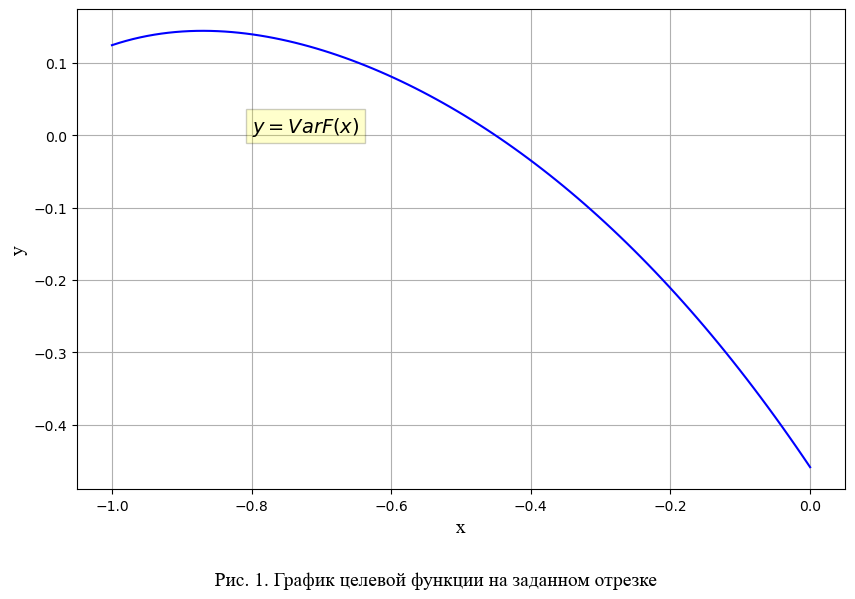

In [3]:
import matplotlib.pyplot as plt
plt.axes([0.8, 1, 1.2, 1])
x = np.linspace(-1,0,100)
plt.plot(x, VarF(x), color='blue')
#plt.title(r'Целевая функция',fontsize=14, fontname='Times New Roman')
plt.xlabel('x',fontsize=14, fontname='Times New Roman')
plt.ylabel('y',fontsize=14, fontname='Times New Roman')
plt.text(-0.8,0.005, r'$y = VarF(x)$', fontsize=14, bbox={'facecolor':'yellow','alpha':0.2}) 
plt.grid(True)
#plt.tight_layout()
plt.figtext(1, 0.8,'  Рис. 1. График целевой функции на заданном отрезке',
            fontsize=14, fontname='Times New Roman')
plt.show()

# Метод дихотомии для поиска максимума

In [4]:
def DichotomyMinSearch(func, a, b, eps):
    delta = np.longdouble(eps/4)
    length = b - a
    while length > eps:
        x1 = (a+b)/2 - delta
        x2 = (a+b)/2 + delta
        f1 = func(x1)
        f2 = func(x2)
        if f1 >= f2:
            b = x2
        else:
            a = x1
        length = b - a
    res = (a+b)/2
    return res, func(res)

<font size="4">Проанализируем метод дихотомии. Для этого напишем его реализацию с выводом необходимой информации о&nbsp;количестве итераций и промежуточных значениях.</font>

In [5]:
def InfoDichotomyMinSearch(func, a, b, eps):
    iters = 0
    avals = [a]
    bvals = [b]
    delta = np.longdouble(eps/4)
    length = b - a
    while length > eps:
        x1 = (a+b)/2 - delta
        x2 = (a+b)/2 + delta
        f1 = func(x1)
        f2 = func(x2)
        if f1 >= f2:
            b = x2
        else:
            a = x1
        avals.append(a)
        bvals.append(b)
        length = b - a
        iters += 1
    res = (a+b)/2
    return res, iters, avals, bvals, func(res)

<font size="4">Метод дихотомии при различных ε: </font>

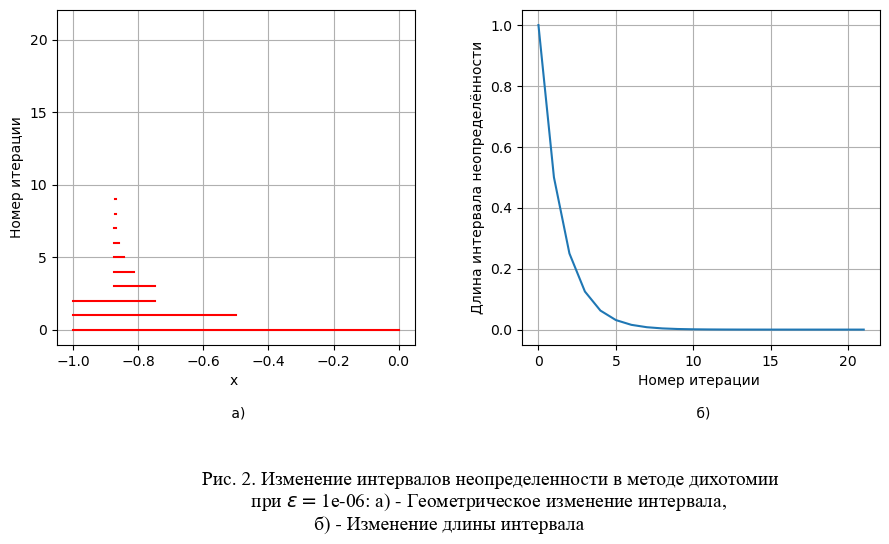

In [14]:
eps = eps2
xpoint, itercount, avalues, bvalues, ymax = InfoDichotomyMinSearch(VarF, a, b, eps)
fig, axs = plt.subplots(nrows=1, ncols=2,figsize=(9, 5))#layout="constrained"
for i in range(itercount+1):
    axs[0].plot([avalues[i], bvalues[i]],[i,i], 'r')
axs[0].grid()
#plt.title(f'Визуальное изменение интервалов неопределенности, $ε = ${eps}',fontsize=14, fontname='Times New Roman')
#axs[1].xlabel('x',fontsize=14, fontname='Times New Roman')
#axs[1].ylabel('Номер итерации',fontsize=14, fontname='Times New Roman')
axs[0].set(xlabel='x \n \n a)', ylabel='Номер итерации')
#plt.yticks([])
plt.figtext(0.23, -0.07, f'Рис. 2. Изменение интервалов неопределенности в методе дихотомии \n          при $ε = ${eps}: а) - Геометрическое изменение интервала, \n                       б) - Изменение длины интервала',
            fontsize=14, fontname='Times New Roman')
#plt.show()
axs[1].plot([i for i in range(itercount+1)],[(bvalues[i]-avalues[i]) for i in range(itercount+1)])
plt.grid()
#plt.title(f'Изменение длины интервала неопределенности, $ε = ${eps}',fontsize=14, fontname='Times New Roman')
#ax2.xlabel('Номер итерации',fontsize=14, fontname='Times New Roman')
#ax2.ylabel('Длина интервала неопределённости',fontsize=14, fontname='Times New Roman')
axs[1].set(xlabel='Номер итерации \n \n б)', ylabel='Длина интервала неопределённости')
plt.tight_layout()
plt.subplots_adjust( wspace=0.3,bottom=0.3)
# set the spacing between subplots
# plt.subplots_adjust(left=0.2,
#                     bottom=0.1,
#                     right=1,
#                     top=1,
#                     wspace=0.5,
#                     hspace=0.9)
plt.show()

<font size="4">Результаты вычисления максимума функции на заданном отрезке методом дихотомии с различой точностью:
    </font>

In [15]:
import pandas as pd
from IPython.display import HTML
xpoint1, itercount1, avalues1, bvalues1, ymax1 = InfoDichotomyMinSearch(VarF, a, b, eps1)
xpoint2, itercount2, avalues2, bvalues2, ymax2 = InfoDichotomyMinSearch(VarF, a, b, eps2)
xpoint3, itercount3, avalues3, bvalues3, ymax3 = InfoDichotomyMinSearch(VarF, a, b, eps3)
#      # кол-во итераций / кол-во вычисленных значений / абсцисса экстремума / максимальное значение функции
# eps1
# eps2
# eps3
precisions = [eps1, eps2, eps3]
itercounts = [itercount1, itercount2, itercount3]
df1 = pd.DataFrame({"Точность": [format(eps1,'0.1e'), 
                                format(eps2,'0.1e'),
                                format(eps3, '0.1e')], 
                    "Кол-во итераций": [elem for elem in itercounts], 
                    "Кол-во вычисленных значений": [elem*2 for elem in itercounts],
                    "Абсцисса экстремума":[format(xpoint1,'0.2f'), 
                                           format(xpoint2,'0.6f'), 
                                           format(xpoint3, '0.17f')],
                    "Максимальное значение функции": [format(ymax1,'0.2f'), 
                                                      format(ymax2,'0.6f'), 
                                                      format(ymax3, '0.17f')]})
s = df1.style.hide(axis="index").set_caption("Табл. 1. Результаты поиска максимума $VarF(x)$ методом дихотомии")
cell_hover = {  # for row hover use <tr> instead of <td>
    'selector': 'td:hover',
    'props': [('background-color', '#ffffb3')]
}
headers = {
    'selector': 'th:not(.index_name)',
    'props': 'background-color: #000066; color: white;'
}
s.set_table_styles([cell_hover, headers])
s.set_table_styles([
    {'selector': 'th.col_heading', 'props': 'text-align: center;'},
    {'selector': 'th.col_heading.level0', 'props': 'font-size: 1.4em;'},
    {'selector': 'td', 'props': 'text-align: center; font-weight: bold; font-size: 16px;'},
    {'selector': 'td:nth-child(4)', 'props': 'text-align: left; font-weight: bold; font-size: 16px'},
    {'selector': 'td:nth-child(5)', 'props': 'text-align: left; font-weight: bold; font-size: 16px;'},
    {'selector': 'caption', 'props': [('color', 'black'),('font-size', '18px'),('text-align','right'),
                                     ('font-family', 'Times New Roman')]},
], overwrite=False)
s.set_table_styles([{'selector': 'th', 'props': 'border-left: 1px solid white'},
            {'selector': 'td', 'props': 'border-left: 1px solid #000066'}], overwrite=False)

s


Точность,Кол-во итераций,Кол-во вычисленных значений,Абсцисса экстремума,Максимальное значение функции
1.0e-02,8,16,-0.87,0.14
1.0e-06,21,42,-0.869782,0.144194
1.0e-17,54,108,-1.00000000000000000,0.12433440436006385


# Метод золотого сечения для поиска максимума

In [8]:
def GoldenRatioMinSearch(func, a, b, eps):
    tau = np.longdouble((1 + np.sqrt(5))/2)
    length = b - a
    x1 = a + (1 - 1/tau)*length
    x2 = a + length/tau
    f1 = func(x1)
    f2 = func(x2)
    while length > eps:
        if f1 >= f2:
            b = x2
            x2 = x1
            x1 = a + b - x2
            f2 = f1
            f1 = func(x1)
        else:
            a  = x1
            x1 = x2
            x2 = a + b - x1
            f1 = f2
            f2 = func(x2)
        length = b - a
    res = (a+b)/2
    return res, func(res)

<font size="4">Проанализируем метод золотого сечения. Для этого напишем его реализацию с выводом необходимой информации о количестве итераций и промежуточных значениях.</font>

In [9]:
def InfoGoldenRatioMinSearch(func, a, b, eps):
    iters = 0
    fcalls = 0
    avals = [a]
    bvals = [b]
    tau = np.longdouble((1 + np.sqrt(5))/2)
    length = b - a
    x1 = a + (1 - 1/tau)*length
    x2 = a + length/tau
    f1 = func(x1)
    f2 = func(x2)
    fcalls += 2
    while length > eps:
        if f1 >= f2:
            b = x2
            x2 = x1
            x1 = a + b - x2
            f2 = f1
            f1 = func(x1)
            fcalls += 1
        else:
            a  = x1
            x1 = x2
            x2 = a + b - x1
            f1 = f2
            f2 = func(x2)
            fcalls += 1
        length = b - a
        iters += 1
        avals.append(a)
        bvals.append(b)
    res = (a+b)/2
    return res, iters, avals, bvals, func(res), fcalls

<font size="4"> Метод золотого сечения при различных ε: </font> 

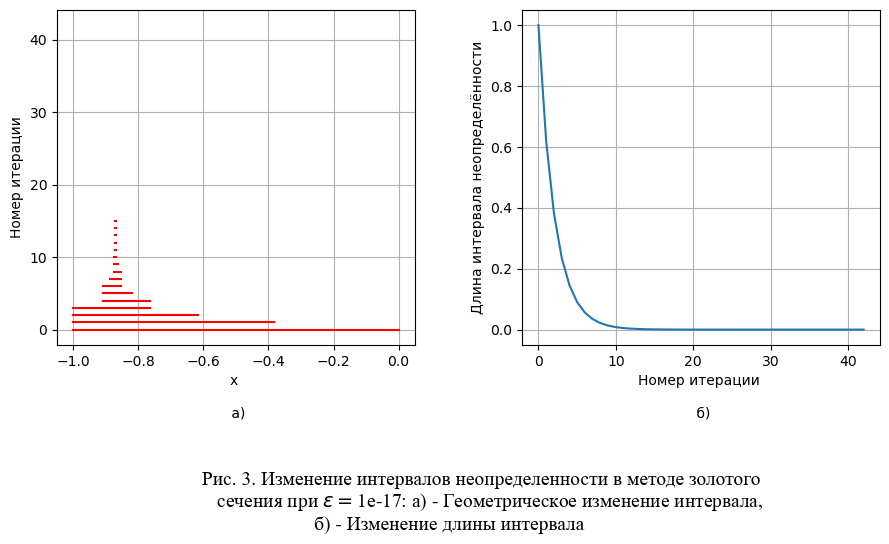

In [16]:
eps = eps3
xpoint, itercount, avalues, bvalues, ymax, calls = InfoGoldenRatioMinSearch(VarF, a, b, eps)
fig, axs = plt.subplots(nrows=1, ncols=2,figsize=(9, 5))#layout="constrained"
for i in range(itercount+1):
    axs[0].plot([avalues[i], bvalues[i]],[i,i], 'r')
axs[0].grid()
axs[0].set(xlabel='x \n \n a)', ylabel='Номер итерации')
plt.figtext(0.23, -0.07, f'Рис. 3. Изменение интервалов неопределенности в методе золотого \n   сечения при $ε = ${eps}: а) - Геометрическое изменение интервала, \n                       б) - Изменение длины интервала',
            fontsize=14, fontname='Times New Roman')
axs[1].plot([i for i in range(itercount+1)],[(bvalues[i]-avalues[i]) for i in range(itercount+1)])
plt.grid()
axs[1].set(xlabel='Номер итерации \n \n б)', ylabel='Длина интервала неопределённости')
plt.tight_layout()
plt.subplots_adjust( wspace=0.3,bottom=0.3)
plt.show()

<font size="4">Результаты вычисления максимума функции на заданном отрезке методом золотого сечения с различой точностью:
    </font>

In [17]:
xpoint1g, itercount1g, avalues1g, bvalues1g, ymax1g, calls1 = InfoGoldenRatioMinSearch(VarF, a, b, eps1)
xpoint2g, itercount2g, avalues2g, bvalues2g, ymax2g, calls2 = InfoGoldenRatioMinSearch(VarF, a, b, eps2)
xpoint3g, itercount3g, avalues3g, bvalues3g, ymax3g, calls3 = InfoGoldenRatioMinSearch(VarF, a, b, eps3)
itercountsg = [itercount1g, itercount2g, itercount3g]
df2 = pd.DataFrame({"Точность": [format(eps1,'0.1e'), 
                                format(eps2,'0.1e'),
                                format(eps3, '0.1e')], 
                    "Кол-во итераций": [elem for elem in itercountsg], 
                    "Кол-во вычисленных значений": [calls1, calls2, calls3],
                    "Абсцисса экстремума":[format(xpoint1g,'0.2f'), 
                                           format(xpoint2g,'0.6f'), 
                                           format(xpoint3g, '0.17f')],
                    "Максимальное значение функции": [format(ymax1g,'0.2f'), 
                                                      format(ymax2g,'0.6f'), 
                                                      format(ymax3g, '0.17f')]})
s2 = df2.style.hide(axis="index").set_caption("Табл. 2. Результаты поиска максимума $VarF(x)$ методом золотого сечения")
cell_hover = {  # for row hover use <tr> instead of <td>
    'selector': 'td:hover',
    'props': [('background-color', '#ffffb3')]
}
headers = {
    'selector': 'th:not(.index_name)',
    'props': 'background-color: #000066; color: white;'
}
s2.set_table_styles([cell_hover, headers])
s2.set_table_styles([
    {'selector': 'th.col_heading', 'props': 'text-align: center;'},
    {'selector': 'th.col_heading.level0', 'props': 'font-size: 1.4em;'},
    {'selector': 'td', 'props': 'text-align: center; font-weight: bold; font-size: 16px;'},
    {'selector': 'td:nth-child(4)', 'props': 'text-align: left; font-weight: bold; font-size: 16px'},
    {'selector': 'td:nth-child(5)', 'props': 'text-align: left; font-weight: bold; font-size: 16px;'},
    {'selector': 'caption', 'props': [('color', 'black'),('font-size', '18px'),('text-align','right'),
                                     ('font-family', 'Times New Roman')]},
], overwrite=False)
s2.set_table_styles([{'selector': 'th', 'props': 'border-left: 1px solid white'},
            {'selector': 'td', 'props': 'border-left: 1px solid #000066'}], overwrite=False)

s2

Точность,Кол-во итераций,Кол-во вычисленных значений,Абсцисса экстремума,Максимальное значение функции
1.0e-02,10,12,-0.87,0.14
1.0e-06,29,31,-0.869781,0.144194
1.0e-17,42,44,-0.86978165247173567,0.14419393623713664


# Выводы

 <font size="4"> 
    Сделаем выводы о преимуществах и недостатках методов, проанализировав их стоимости. </font>
    <br>
    <br>
  <font size="4">    
    Для нахождения максимума целевой функции $VarF(x)$ при $ε = 0.01$ метод дихотомии требует 9* итераций, в то время как метод золотого сечения	— 11*. Однако количество вызовов целевой функции у первого метода больше, чем у второго (16 для дихотомии против 12 для золотого сечения)*. </font>
    <br>
  <font size="4">
    Аналогичная ситуация и при $ε = 10^{-6}$: количество итераций метода золотого сечения превышает количество итераций метода дихотомии (30 против 22)*, а количество вычислений целевой функции у метода золотого сечения меньше, чем у метода дихотомии (31 против 42)*.
    <br>
    </font>

<font size="4">
    Существенная разница методов появляется при $ε = 10^{-17}$. При такой точности вычислений метод золотого сечения требует меньше не только вызовов $VarF(x)$ (более чем в два раза меньше вызовов), но и итераций     
(42 у золотого сечения против 59 у дихотомии)*. 

<font size="4">
    Отличается и качество вычислений. На высокой точности метод дихотомии требует большего количества вычислений целевой функции и итераций, поэтому накопленная ошибка у него выше. Это можно проследить, сравнив результаты вычислений обоих методов на разных точностях.
    </font>

<font size="4">
    Подводя итоги, можно сделать следующий вывод. Для относительно небольших точностей алгоритмы методов дихотомии и золотого сечения аналогичны. Различие состоит лишь в том, что в методе дихотомии расстояние $2δ$ между внутренними точками $x_{k1}$ и $x_{k2}$ интервала неопределённости остаётся на каждом $k$-м шаге неизменным, а методе золотого сечения оно зависит от номера шага поиска и уменьшается с уменьшением длины интервала неопределённости по мере возрастания номера шага.
    <br>
</font>

<font size="4">
 Для метода золотого сечения:
<br>
$$
x_{k1} = a_k + (1 - 1/ \tau) l_k
$$
<br>
$$
x_{k2} = a_k + l_k / \tau
$$
    <br>
$$
x_{k2} - x_{k1} = (2/ \tau - 1)l_k
$$
    </font>

<font size="4">
 Для метода дихотомии:
<br>
$$
x_{k1} = (a_k + b_k)/2 - \delta
$$
<br>
$$
x_{k1} = (a_k + b_k)/2 + \delta
$$
    <br>
$$
x_{k2} - x_{k1} = 2 \delta
$$
    </font>

<font size="4"> При работе с большими точностями (например, $ε = 10^{-17}$) алгоритм дихотомии проигрывает алгоритму золотого сечения по стоимости, которая состоит из количества итераций и вычислений целевой функции. </font>

In [12]:
s

Точность,Кол-во итераций,Кол-во вычисленных значений,Абсцисса экстремума,Максимальное значение функции
1.0e-02,9,16,-0.87,0.14
1.0e-06,22,42,-0.869782,0.144194
1.0e-17,55,108,-1.00000000000000000,0.12433440436006385


In [13]:
s2

Точность,Кол-во итераций,Кол-во вычисленных значений,Абсцисса экстремума,Максимальное значение функции
1.0e-02,11,12,-0.87,0.14
1.0e-06,30,31,-0.869781,0.144194
1.0e-17,43,44,-0.86978165247173567,0.14419393623713664


\* примечание: вычисления были проведены на машине с Ubuntu 20.04. Число итераций может отличаться в зависимости от ЭВМ, так как  np.longdouble на Windows есть float80, а на \*unix-системах есть float128. 

In [31]:
def CheckDichotomyMinSearch(func, a, b, eps):
    print('eps =', eps)
    print(f'iteration №0:')
    i = 0
    delta = np.longdouble(eps/4)
    print('delta =', delta)
    length = b - a
    print('len =', length)
    print('------------')
    while length > eps:
        i += 1
        print(f'iteration №{i}:')
        x1 = (a+b)/2 - delta
        x2 = (a+b)/2 + delta
        print('x1 =', x1)
        print('x2 =', x2)
        f1 = func(x1)
        f2 = func(x2)
        print('f1 =', f1)
        print('f2 =', f2)
        if f1 >= f2:
            b = x2
        else:
            a = x1
        length = b - a
        print('len =', length)
        print('------------')
    res = (a+b)/2
    print('res =', res)
    return res, func(res)
CheckDichotomyMinSearch(VarF, a, b, eps3)

eps = 1e-17
iteration №0:
delta = 2.5e-18
len = 1
------------
iteration №1:
x1 = -0.5
x2 = -0.5
f1 = 0.03005322081876638
f2 = 0.03005322081876638
len = 0.5
------------
iteration №2:
x1 = -0.75
x2 = -0.75
f1 = 0.13058123457849355
f2 = 0.13058123457849355
len = 0.25
------------
iteration №3:
x1 = -0.875
x2 = -0.875
f1 = 0.14416549386175884
f2 = 0.14416549386175884
len = 0.125
------------
iteration №4:
x1 = -0.9375
x2 = -0.9375
f1 = 0.1391326969762905
f2 = 0.1391326969762905
len = 0.0625
------------
iteration №5:
x1 = -0.96875
x2 = -0.96875
f1 = 0.13306364918021318
f2 = 0.13306364918021318
len = 0.03125
------------
iteration №6:
x1 = -0.984375
x2 = -0.984375
f1 = 0.1290466916923664
f2 = 0.1290466916923664
len = 0.015625
------------
iteration №7:
x1 = -0.9921875
x2 = -0.9921875
f1 = 0.126779454504664
f2 = 0.126779454504664
len = 0.0078125
------------
iteration №8:
x1 = -0.99609375
x2 = -0.99609375
f1 = 0.12557941118312696
f2 = 0.12557941118312696
len = 0.00390625
------------
itera

(-1.0, 0.12433440436006385)

In [30]:
i = 0
epsilon = 1.0
while(1.0 + epsilon > 1.0):
    epsilon = epsilon / 2.0
    i += 1
print(epsilon)
print(i)

1.1102230246251565e-16
53
